In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as acc
import numpy as np
from lime import explanation
from lime import lime_base
import math

In [2]:
from lime_timeseries import LimeTimeSeriesExplainer

## Load Coffee Dataset

In [50]:
coffee_train = pd.read_csv('data/coffee_train.csv', sep=',', header=None).astype(float)
coffee_train_y = coffee_train.loc[:, 0]
coffee_train_x = coffee_train.loc[:, 1:]
coffee_test = pd.read_csv('data/coffee_test.csv', sep=',', header=None).astype(float)
coffee_test_y = coffee_test.loc[:, 0]
coffee_test_x = coffee_test.loc[:, 1:]

## Load ECG Dataset

In [51]:
ecg_train = pd.read_csv('data/ecg_test.csv', sep=',', header=None).astype(float)
ecg_train.replace([np.inf, -np.inf], np.nan).dropna()
ecg_train = ecg_train.loc[:186, :]
ecg_train_y = ecg_train.loc[:, 0]
ecg_train_x = ecg_train.loc[:, 1:]
ecg_test = pd.read_csv('data/ecg_train.csv', sep=',', header=None).astype(float)
ecg_test.replace([np.inf, -np.inf], np.nan).dropna()
ecg_test_y = ecg_test.loc[:, 0]
ecg_test_x = ecg_test.loc[:, 1:]

## Datasets

Let's plot the two time series datasets using different colors for each class.

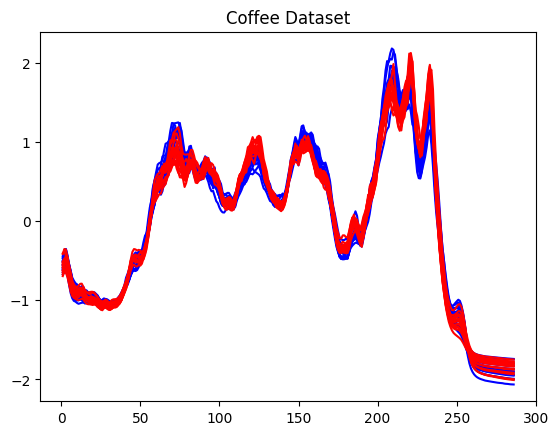

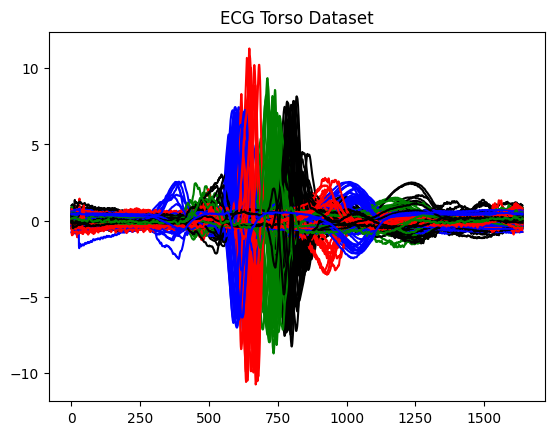

In [52]:
for idx in range(0, len(coffee_train)):
    if coffee_train_y[idx] == 0:
        plt.plot(coffee_train_x.loc[idx, :], 'b')
    else:
        plt.plot(coffee_train_x.loc[idx, :], 'r')
plt.title('Coffee Dataset')
plt.show()

for idx in range(0, len(ecg_train)):
    if ecg_train_y[idx] == 4:
        plt.plot(ecg_train_x.loc[idx, :], 'b')
    elif ecg_train_y[idx] == 1:
        plt.plot(ecg_train_x.loc[idx, :], 'r')
    elif ecg_train_y[idx] == 2:
        plt.plot(ecg_train_x.loc[idx, :], 'g')
    elif ecg_train_y[idx] == 3:
        plt.plot(ecg_train_x.loc[idx, :], 'black')
plt.title('ECG Torso Dataset')
plt.show()

### Compute Accuracy

We train a kNN classifier on that data and print the accuracy. We want to explain this classifier using LIME.

In [53]:
knn = KNN()
knn.fit(coffee_train_x, coffee_train_y)
knn2 = KNN()
knn2.fit(ecg_train_x, ecg_train_y)
print('Accuracy KNN for coffee dataset: %f' % (acc(coffee_test_y, knn.predict(coffee_test_x))))
print('Accuracy KNN for earthquake dataset: %f' % (acc(ecg_test_y, knn2.predict(ecg_test_x))))

Accuracy KNN for coffee dataset: 0.964286
Accuracy KNN for earthquake dataset: 0.900000


In [59]:
coffee_train_y

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
Name: 0, dtype: float64

## Explaining Coffee Dataset

In [63]:
idx = 5 # explained instance
num_features = 10 # how many feature contained in explanation
num_slices = 24 # split time series
series = coffee_test_x.iloc[20, :]

In [62]:
series.shape

(286,)

In [64]:
knn.predict_proba(np.expand_dims(series,0))

array([[0., 1.]])

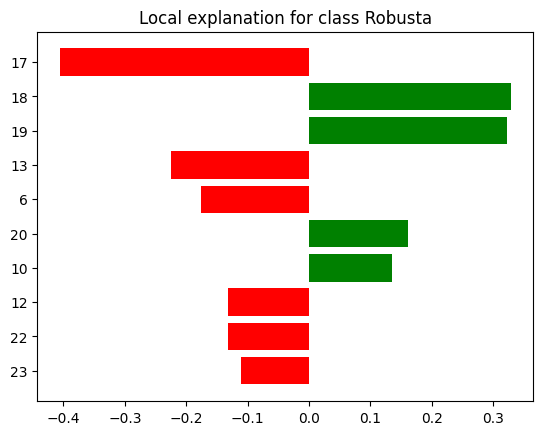

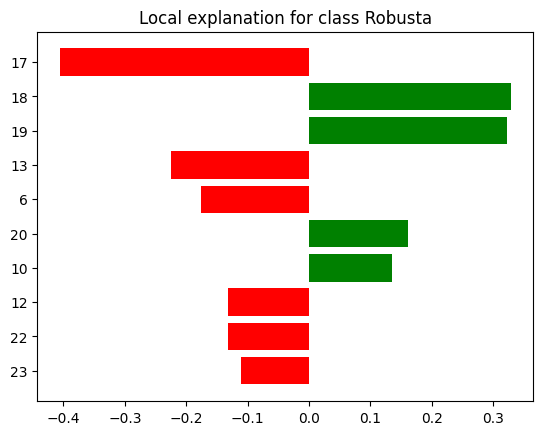

In [8]:
explainer = LimeTimeSeriesExplainer(class_names=['Arabica', 'Robusta'])
exp = explainer.explain_instance(series, knn.predict_proba, num_features=num_features, num_samples=5000, num_slices=num_slices, 
                                 replacement_method='total_mean')
exp.as_pyplot_figure()

Let's plot the relevant slices in our time series. Highlighted depending on their impact on the classification result.

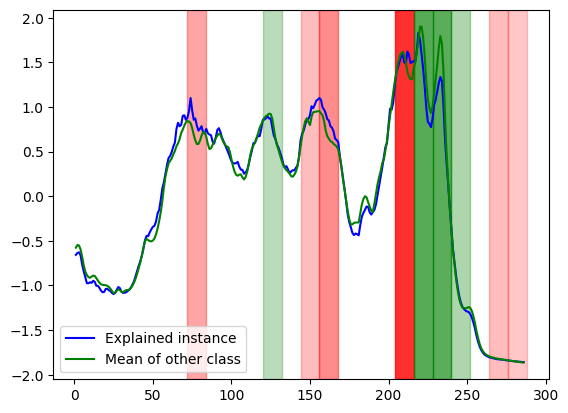

In [9]:
values_per_slice = math.ceil(len(series) / num_slices)
plt.plot(series, color='b', label='Explained instance')
plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower left')

for i in range(num_features):
    feature, weight = exp.as_list()[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    color = 'red' if weight < 0 else 'green' 
    plt.axvspan(start , end, color=color, alpha=abs(weight*2))
plt.show()

## Explaining ECG Dataset

In [10]:
idx_ecg = 11 # explained instance
num_features_ecg = 5 # how many feature contained in explanation
num_slices_ecg = 17 # split time series
series_ecg = ecg_test_x.iloc[idx_ecg, :]

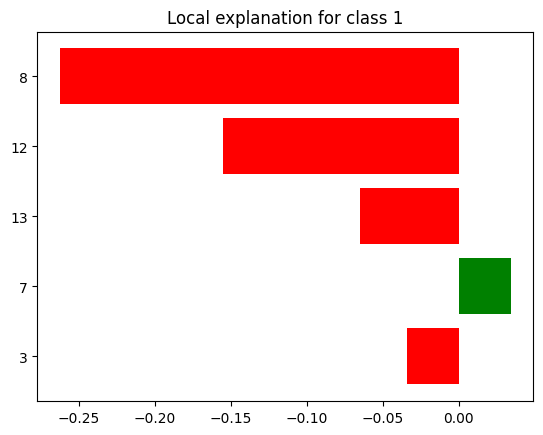

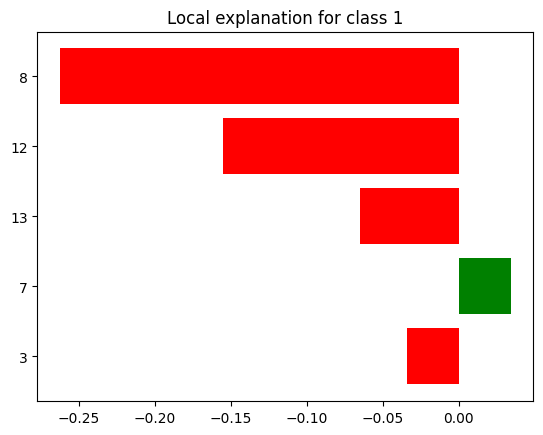

In [11]:
explainer2 = LimeTimeSeriesExplainer()
exp2 = explainer2.explain_instance(series_ecg, knn2.predict_proba, num_features=num_features_ecg, num_samples=500, num_slices=num_slices_ecg, 
                                 replacement_method='noise')
exp2.as_pyplot_figure()

# my own

In [3]:
#run pipeline
import torch
import torch.nn as nn
import torch.nn.functional as F
import yaml
import os
import numpy as np
import pprint 
import json
pp = pprint.PrettyPrinter(indent=4)
from torch.utils.data import DataLoader, Dataset
import traceback
import sys
from torchmetrics.classification import MultilabelAUROC, MultilabelF1Score, BinaryAUROC, BinaryF1Score
from torcheval.metrics import MultilabelAUPRC, BinaryAUPRC, MultilabelAccuracy, BinaryAccuracy
from statistics import mean
import torch.optim as optim
import pytorch_warmup as warmup
import gc
import wandb
import functools
import hashlib
from tqdm import tqdm
import time
#from ResNet import *
#from vit_pytorch import *
#from cross_vit_pytorch import *
from EfficientNetv2 import *
import pandas as pd
import numpy as np
import warnings
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import savgol_filter, butter, lfilter
from scipy.interpolate import interp1d
warnings.filterwarnings("ignore")

In [4]:
X_eval = np.load('/media/datasets/anolin/benchmark2/X_test_v1.2.npy')
Y_eval = np.load('/media/datasets/anolin/benchmark2/Y_test_v1.2.npy')

In [5]:
list_clean_labels = ['Sinusal','Regular','Monomorph','QS complex in V1-V2-V3','R complex in V5-V6','T wave inversion (inferior - II, III, aVF)','Left bundle branch block','RaVL > 11 mm','SV1 + RV5 or RV6 > 35 mm','T wave inversion (lateral -I, aVL, V5-V6)','T wave inversion (anterior - V3-V4)','Left axis deviation','Left ventricular hypertrophy','Bradycardia','Q wave (inferior - II, III, aVF)','Afib','Irregularly irregular','Atrial tachycardia (>= 100 BPM)','Nonspecific intraventricular conduction delay','Premature ventricular complex','Polymorph','T wave inversion (septal- V1-V2)','Right bundle branch block','Ventricular paced','ST elevation (anterior - V3-V4)','ST elevation (septal - V1-V2)','1st degree AV block','Premature atrial complex','Atrial flutter',"rSR' in V1-V2",'qRS in V5-V6-I, aVL','Left anterior fascicular block','Right axis deviation','2nd degree AV block - mobitz 1','ST depression (inferior - II, III, aVF)','Acute pericarditis','ST elevation (inferior - II, III, aVF)','Low voltage','Regularly irregular','Bifid','Junctional rhythm','Left atrial enlargement','ST elevation (lateral - I, aVL, V5-V6)','Atrial paced','Right ventricular hypertrophy','Delta wave','Wolff-Parkinson-White (Pre-excitation syndrome)','Prolonged QT','ST depression (anterior - V3-V4)','QRS complex negative in III','RaVL + SV3 > 28 mm (H) or 20 mm (F)','Q wave (lateral- I, aVL, V5-V6)','Hyperacute T wave (lateral, V5-V6)','Hyperacute T wave (septal, V1-V2)','Supraventricular tachycardia','ST downslopping','ST depression (lateral - I, avL, V5-V6)','2nd degree AV block - mobitz 2','U wave','ST depression et T inversion in V5 or V6','Large >0.08 s','R/S ratio in V1-V2 >1','RV1 + SV6 > 11 mm','Left posterior fascicular block','Right atrial enlargement','ST depression (septal- V1-V2)','Q wave (septal- V1-V2)','Q wave (anterior - V3-V4)','Hyperacute T wave (anterior, V3-V4)','ST upslopping','Right superior axis','Auricular bigeminy','Ventricular tachycardia','ST elevation (posterior - V7-V8-V9)','Ectopic atrial rhythm (< 100 BPM)','Lead misplacement','Biphasic','Ventricular bigeminy','J wave','Tall >2.5 mm','Third Degree AV Block','Sinus Pause','Acute MI','Early repolarization','Q wave (posterior - V7-V9)','Bi-atrial enlargement','LV pacing','Dextrocardia','Brugada','Ventricular Rhythm','ST depression (posterior - V7-V8-V9)','no_qrs']
labels_to_remove = ['ST depression (posterior - V7-V8-V9)','Tall >2.5 mm', 'J wave', 'Auricular bigeminy', 'Ventricular bigeminy', 'Sinus Pause', 'Dextrocardia', 'Hyperacute T wave (lateral, V5-V6)', 'Hyperacute T wave (septal, V1-V2)', 'Hyperacute T wave (anterior, V3-V4)', 'Bifid', 'RaVL + SV3 > 28 mm (H) or 20 mm (F)', 'Large >0.08 s', 'Biphasic', 'ST depression et T inversion in V5 or V6']

pos_to_drop = list()
new_label_names = list()
for pos, item in enumerate(list_clean_labels):
    if item in labels_to_remove:
        pos_to_drop.append(pos)
    else:
        new_label_names.append(item)

Y_eval = np.delete(Y_eval, pos_to_drop, axis=1)
Y_eval.shape

(287039, 77)

In [6]:
series = X_eval[0]

In [7]:
series = np.expand_dims(series.flatten(),0)

In [8]:
series.shape

(1, 30000)

In [7]:
path_best = '/media/datasets/anolin/benchmark2/model_weights/efficientnet_both_0.052963132853619754_MultiLabelSoftMarginLoss_16_EMA.h5'
model  = torch.load(path_best).to('cuda:0')

In [8]:
new_label_names

['Sinusal',
 'Regular',
 'Monomorph',
 'QS complex in V1-V2-V3',
 'R complex in V5-V6',
 'T wave inversion (inferior - II, III, aVF)',
 'Left bundle branch block',
 'RaVL > 11 mm',
 'SV1 + RV5 or RV6 > 35 mm',
 'T wave inversion (lateral -I, aVL, V5-V6)',
 'T wave inversion (anterior - V3-V4)',
 'Left axis deviation',
 'Left ventricular hypertrophy',
 'Bradycardia',
 'Q wave (inferior - II, III, aVF)',
 'Afib',
 'Irregularly irregular',
 'Atrial tachycardia (>= 100 BPM)',
 'Nonspecific intraventricular conduction delay',
 'Premature ventricular complex',
 'Polymorph',
 'T wave inversion (septal- V1-V2)',
 'Right bundle branch block',
 'Ventricular paced',
 'ST elevation (anterior - V3-V4)',
 'ST elevation (septal - V1-V2)',
 '1st degree AV block',
 'Premature atrial complex',
 'Atrial flutter',
 "rSR' in V1-V2",
 'qRS in V5-V6-I, aVL',
 'Left anterior fascicular block',
 'Right axis deviation',
 '2nd degree AV block - mobitz 1',
 'ST depression (inferior - II, III, aVF)',
 'Acute peric

In [19]:
Y_eval.shape

(287039, 77)

In [21]:
Y_true = np.load("/media/datasets/anolin/logits/MHI_77_labels/Y_ground_truth.npy")
Y_pred = np.load("/media/datasets/anolin/logits/MHI_77_labels/logits.npy")

In [56]:
import numpy as np
import pandas as pd

def find_top_three_matches_with_confidence(Y_true, Y_predict, column_names, label_name, confidence_threshold=0.9):
    """
    Find the first three occurrences where Y_predict confidence exceeds the threshold for a given label,
    ensuring that the true value for the label is 1. Return the indices and corresponding confidence scores.
    
    Parameters:
    - Y_true: np.ndarray or pd.DataFrame (shape: [n_samples, n_labels]), true labels (binary).
    - Y_predict: np.ndarray or pd.DataFrame (shape: [n_samples, n_labels]), predicted logits.
    - column_names: list, names of the columns corresponding to the labels.
    - label_name: str, the name of the label to search for matches.
    - confidence_threshold: float, the confidence threshold for matching predictions (default: 0.9).
    
    Returns:
    - list of tuples: Each tuple contains (index, confidence) for the top three matching rows.
    """
    # Convert to DataFrame if needed
    if isinstance(Y_true, np.ndarray):
        Y_true = pd.DataFrame(Y_true, columns=column_names)
    if isinstance(Y_predict, np.ndarray):
        Y_predict = pd.DataFrame(Y_predict, columns=column_names)

    # Ensure the label exists
    if label_name not in column_names:
        raise ValueError(f"Label '{label_name}' not found in column names.")

    # Extract the specific label's true and predicted values
    true_values = Y_true[label_name].values
    predicted_logits = Y_predict[label_name].values

    # Apply sigmoid to convert logits to probabilities
    predicted_probabilities = 1 / (1 + np.exp(-predicted_logits))

    # Find the indices and confidence scores where true == 1 and confidence > threshold
    matches = [
        (idx, prob) for idx, (true, prob) in enumerate(zip(true_values, predicted_probabilities))
        if true == 1 and prob > confidence_threshold
    ]

    # Return the first three matches (or fewer if not enough matches are found)
    return matches[:10]



In [57]:
top_three_matches = find_top_three_matches_with_confidence(
    Y_true, Y_pred, new_label_names, 'Afib', confidence_threshold=0.9
)

# Output
print("Top three matches (index, confidence):", top_three_matches)

Top three matches (index, confidence): [(11, 0.9886634), (12, 0.98383784), (13, 0.95890564), (14, 0.97640187), (15, 0.9757996), (16, 0.95797056), (17, 0.97996897), (18, 0.9787204), (19, 0.91625535), (20, 0.97529966)]


In [192]:
import torch
import numpy as np
from tqdm import tqdm

# Assuming your model is on CUDA (GPU) if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
# Define your multilabel predict_fn (77 binary labels)


# Define the LIME explanation function
def explain_label(series, explainer, predict_fn, label_index, num_slices=500, num_features=50):
    """
    Explain the instance for a specific label and plot the explanation on top of the signal.
    """
    exp = explainer.explain_instance(series, predict_fn, num_features=num_features,
                                     num_samples=500, num_slices=num_slices, 
                                     replacement_method='total_mean')

    # Extract feature weights for the current label
    feature_weights = exp.as_list(label=label_index)
    return feature_weights

# Loop over all labels and explain them
dict_results = {}

# Example time series data (replace with actual time series)
series = X_eval[0]
series = series.flatten()
explainer = LimeTimeSeriesExplainer(class_names=new_label_names)

# Loop over each label and explain it
for label_index, label_name in enumerate(tqdm(new_label_names)):
    print(f"Explaining for label: {label_name} (Index: {label_index})")

    def predict_fn(X, index=label_index):
        """
        X: Input data (batch of samples)
        index: Index of the label for which to compute prediction (for multilabel setup)
        """
        # Reshape and move input to device

        X = X.reshape(-1, 12, 2500)  # Adjust this based on your input shape
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

        # Forward pass through the model
        with torch.no_grad():
            output = model(X_tensor)  # Output shape: (batch_size, 77)

        # Apply sigmoid for multilabel classification (77 independent binary tasks)
        output = torch.sigmoid(output)  # Shape: (batch_size, 77)

        # Initialize the one-hot encoded output for the given label (shape: (batch_size, 2))
        one_hot_output = np.zeros((output.shape[0], 2))

        # Get the logit for the requested label (index)
        label_logit = output.cpu().numpy()[:, index]

        # For binary classification, the second column is the complement logit (1 - logit)
        # This would give a one-hot encoding style prediction
        one_hot_output[:, 0] = label_logit  # First column is the logit for the target label
        one_hot_output[:, 1] = 1 - label_logit  # Second column is for the complement label (1 - logit)

        return one_hot_output  # Return a (batch_size, 2) shaped array for the label

    explainer = LimeTimeSeriesExplainer(class_names=label_name)

    # Use the predict_fn within the explain_label function
    exp = explainer.explain_instance(series, predict_fn, num_features=1200, num_samples=500, num_slices=1200, 
                                    replacement_method='noise')

    # Store the explanation for the current label in the results dictionary
    dict_results[label_name] = exp.as_list()

# Example of how to access the results for a specific label
print(f"Explanation for label_0: {dict_results[new_label_names[0]]}")

  0%|          | 0/77 [00:00<?, ?it/s]

Explaining for label: Sinusal (Index: 0)


  0%|          | 0/77 [00:12<?, ?it/s]


KeyboardInterrupt: 

In [216]:
import torch
import numpy as np

# Assuming your model is on CUDA (GPU) if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def get_label_index(label_name, label_names):
    """
    Retrieve the index of a given label name from the list of label names.
    """
    if label_name not in label_names:
        raise ValueError(f"Label name '{label_name}' not found in label names.")
    return label_names.index(label_name)

def predict_fn(X, index):
    """
    Custom prediction function for LIME.
    Args:
        X: Input data (batch of samples).
        index: Index of the label for which to compute prediction.
    Returns:
        One-hot encoded probabilities for the specific label.
    """
    X = X.reshape(-1, 12, 2500)  # Adjust this based on your input shape
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

    with torch.no_grad():
        output = model(X_tensor)  # Output shape: (batch_size, 77)
    output = torch.sigmoid(output).cpu().numpy()  # Apply sigmoid for multilabel classification

    one_hot_output = np.zeros((output.shape[0], 2))
    one_hot_output[:, 0] = output[:, index]  # Target label probability
    one_hot_output[:, 1] = 1 - output[:, index]  # Complement probability
    return one_hot_output

def explain_instance(x_eval, label_name, label_names, num_features=1200, num_slices=1200, num_samples=2000):
    
    """
    Generate LIME explanation for a specific instance and label.
    Args:
        x_eval: The input instance (e.g., from X_eval).
        label_name: The name of the label to explain.
        label_names: List of label names.
        num_features: Number of features to consider for LIME.
        num_slices: Number of slices to partition the signal.
        num_samples: Number of samples for LIME perturbations.
    Returns:
        LIME explanation for the specific label.
    """
    label_index = get_label_index(label_name, label_names)
    explainer = LimeTimeSeriesExplainer(class_names=[label_name])  # Single class for clarity

    def wrapper_predict_fn(X):
        return predict_fn(X, label_index)

    # Reshape input data
    series = x_eval.flatten()
    exp = explainer.explain_instance(series, wrapper_predict_fn, 
                                     num_features=num_features, num_samples=num_samples, num_slices=num_slices, 
                                     replacement_method='noise')
    return exp

In [232]:
# Example usage
x_eval_index = 11  # Choose the instance index
label_name = 'Afib'
new_label_names = new_label_names

try:
    explanation = explain_instance(X_eval[x_eval_index], label_name, new_label_names)
    print(f"Explanation for label '{label_name}':")
    print(explanation.as_list())
except ValueError as e:
    print(e)

Explanation for label 'Afib':
[(394, -0.005224880418953588), (431, 0.004955774250449071), (642, 0.004950636776408755), (531, -0.00489757141774411), (575, -0.0048037556108209405), (464, -0.0045635893313064994), (963, 0.0045582660980244645), (737, -0.004443972127982549), (619, 0.0043301417639762755), (484, -0.004289010968799509), (288, -0.004288626349652129), (870, -0.004280840735281389), (558, 0.004232844360199169), (1148, 0.004148367519576423), (596, -0.0040845863481478294), (567, -0.00406670469272443), (157, 0.004059558105543304), (373, -0.0040070068378921415), (528, -0.0038824942507389537), (1115, 0.0038246642818643003), (893, -0.003800947246037101), (352, -0.003761480532242485), (138, 0.0037515883437013744), (631, 0.0037443850787652606), (267, 0.0036950312107234045), (10, -0.0036689157561822783), (263, 0.003663305701501824), (814, 0.0036439566705738615), (833, -0.003639638629964943), (912, -0.0036331922023277756), (60, 0.003625016756437188), (724, -0.0036164179510912746), (568, 0.00

In [233]:
len(explanation.as_list())

1200

In [234]:
sorted_data = sorted(explanation.as_list(), key=lambda x: x[0])
sorted_data

[(0, -0.0007576753702296848),
 (1, 0.0005315277615790406),
 (2, -0.00017635754978665599),
 (3, 0.001026501564669266),
 (4, 0.0015129169380194317),
 (5, -0.0013295238441361629),
 (6, -0.0008150313559907097),
 (7, -0.00020986363016799268),
 (8, 0.0004485466941107428),
 (9, 0.0003904695847280025),
 (10, -0.0036689157561822783),
 (11, -0.002104547629273211),
 (12, -0.002086355128315721),
 (13, -0.0013523483866845819),
 (14, -0.0007052138895575594),
 (15, -0.0007802183919483223),
 (16, 0.0006385282648646217),
 (17, -0.0012771735524350677),
 (18, 7.020321365246241e-05),
 (19, -0.0014305400539141133),
 (20, -0.0013464592072168788),
 (21, 0.0006237382474291636),
 (22, 0.0018361456774944635),
 (23, 0.0013336598600433437),
 (24, -0.0011298174863565782),
 (25, -0.0011677171038805998),
 (26, -0.0008544283873444284),
 (27, 3.4867973033704856e-05),
 (28, 0.001864222295321802),
 (29, -0.0003728454326002455),
 (30, -0.0027098236643561787),
 (31, 0.00043731477883909473),
 (32, 0.001042610486328222),
 (

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase

def plot_ecg_with_lime(X_eval, index, sorted_data, window_size=10):
    """
    Plots an ECG signal with LIME scores highlighting important regions.
    
    Parameters:
    - X_eval: np.ndarray, the dataset containing ECG signals (shape: [n_samples, 2500, 12]).
    - index: int, the index of the ECG signal in X_eval to visualize.
    - sorted_data: list of tuples, where each tuple contains (window_idx, lime_value).
    - window_size: int, the size of each window for highlighting (default: 10).
    """
    # Prepare the signal
    series = X_eval[index]
    series = np.reshape(series, (2500, 12))  # Reshape to (2500, 12) for proper channel-wise access
    series = series * 0.00488  # Apply scaling (units: mV)
    
    # Define the lead ID list and row definitions
    lead_id_list = ['I', 'II', 'III', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'aVL', 'aVR', 'aVF']
    row_definitions = [
        ['I', 'aVR', 'V1', 'V4'],  # Top row
        ['II', 'aVL', 'V2', 'V5'],  # Middle row
        ['III', 'aVF', 'V3', 'V6']  # Bottom row (before full Lead II)
    ]
    full_lead_II_row = 'II'  # Full Lead II for the last row
    row_y_displacement = [0 - i * 2.0 for i in range(len(row_definitions) + 1)]  # Start at 0, subtract for each row

    # Organize LIME values by channel
    lime_values_per_channel = {i: [] for i in range(12)}
    for window_idx, lime_value in sorted_data:
        channel_idx = window_idx // (2500 // window_size)  # Determine channel based on windows
        lime_values_per_channel[channel_idx].append(lime_value)

    # Normalize LIME values for colormap mapping
    lime_values_flat = [value for sublist in lime_values_per_channel.values() for value in sublist]
    vmin, vmax = min(lime_values_flat), max(lime_values_flat)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Create the colormap
    cmap = plt.cm.coolwarm

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))
    quarter_length = series.shape[0] // 4

    # Plot the background grid (quadrillage)
    small_box_spacing = series.shape[0] / 50  # Small boxes every 0.2 seconds
    large_box_spacing = small_box_spacing * 5  # Large boxes every 1 second

    for x in np.arange(0, series.shape[0], small_box_spacing):
        ax.axvline(x=x, ymin=0, ymax=1, color='gray', linestyle='-', linewidth=0.5, alpha=0.2)
    for x in np.arange(0, series.shape[0], large_box_spacing):
        ax.axvline(x=x, ymin=0, ymax=1, color='gray', linestyle='-', linewidth=1)

    for y in np.arange(-10, 20, 0.1):  # Small grid lines every 0.1 mV
        ax.axhline(y=y, xmin=0, xmax=1, color='gray', linestyle='-', linewidth=0.5, alpha=0.2)
    for y in np.arange(-10, 20, 0.5):  # Large grid lines every 0.5 mV
        ax.axhline(y=y, xmin=0, xmax=1, color='gray', linestyle='-', linewidth=1)

    # Plot each row
    for row_idx, leads in enumerate(row_definitions):
        composite_signal = np.zeros(series.shape[0])
        for i, lead in enumerate(leads):
            channel_idx = lead_id_list.index(lead)
            start = i * quarter_length
            end = (i + 1) * quarter_length
            composite_signal[start:end] = series[start:end, channel_idx]

            # Highlight LIME values for this segment
            lime_start_idx = start // window_size
            lime_end_idx = min(len(lime_values_per_channel[channel_idx]), (end // window_size))
            current_start = start

            for j in range(lime_start_idx, lime_end_idx):
                lime_value = lime_values_per_channel[channel_idx][j]
                lime_end = min(current_start + window_size, end)
                lime_color = cmap(norm(lime_value))

                # Plot the LIME-highlighted segment
                ax.plot(
                    np.arange(current_start, lime_end),
                    composite_signal[current_start:lime_end] + row_y_displacement[row_idx],
                    color=lime_color,
                    linewidth=7
                )
                current_start = lime_end

            # Add the lead name and a small vertical line
            ax.text(
                start + 10,
                composite_signal[start] + row_y_displacement[row_idx] + 0.1,
                lead,
                fontsize=10,
                color='black',
                weight='bold'
            )

        # Plot the composite signal for this row
        ax.plot(
            np.arange(series.shape[0]),
            composite_signal + row_y_displacement[row_idx],
            color='black',
            linewidth=1
        )

    # Plot the full Lead II for the last row
    lead_II_idx = lead_id_list.index(full_lead_II_row)
    full_lead_signal = series[:, lead_II_idx] + row_y_displacement[-1]

    lime_start_idx = 0
    lime_end_idx = len(lime_values_per_channel[lead_II_idx])
    current_start = 0

    for j in range(lime_start_idx, lime_end_idx):
        lime_value = lime_values_per_channel[lead_II_idx][j]
        lime_end = min(current_start + window_size, series.shape[0])
        lime_color = cmap(norm(lime_value))
        ax.plot(
            np.arange(current_start, lime_end),
            full_lead_signal[current_start:lime_end],
            color=lime_color,
            linewidth=7
        )
        current_start = lime_end

    ax.plot(
        np.arange(series.shape[0]),
        full_lead_signal,
        color='black',
        linewidth=1
    )

    # Add Lead II label properly aligned
    ax.text(
        10,
        full_lead_signal[0] + row_y_displacement[-1] + 6.2,
        'II',
        fontsize=10,
        color='black',
        weight='bold'
    )

    # Add a horizontal colorbar as the heatmap legend
    cax = fig.add_axes([0.1, 0.1, 0.8, 0.03])  # Position: [left, bottom, width, height]
    colorbar = ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
    colorbar.set_label('LIME Scores', fontsize=12)

    # Final adjustments
    ax.set_xlim(0, series.shape[0])
    ax.set_ylim(min(row_y_displacement) - 2, max(row_y_displacement) + 1)
    ax.axis('off')
    plt.tight_layout()
    plt.show()



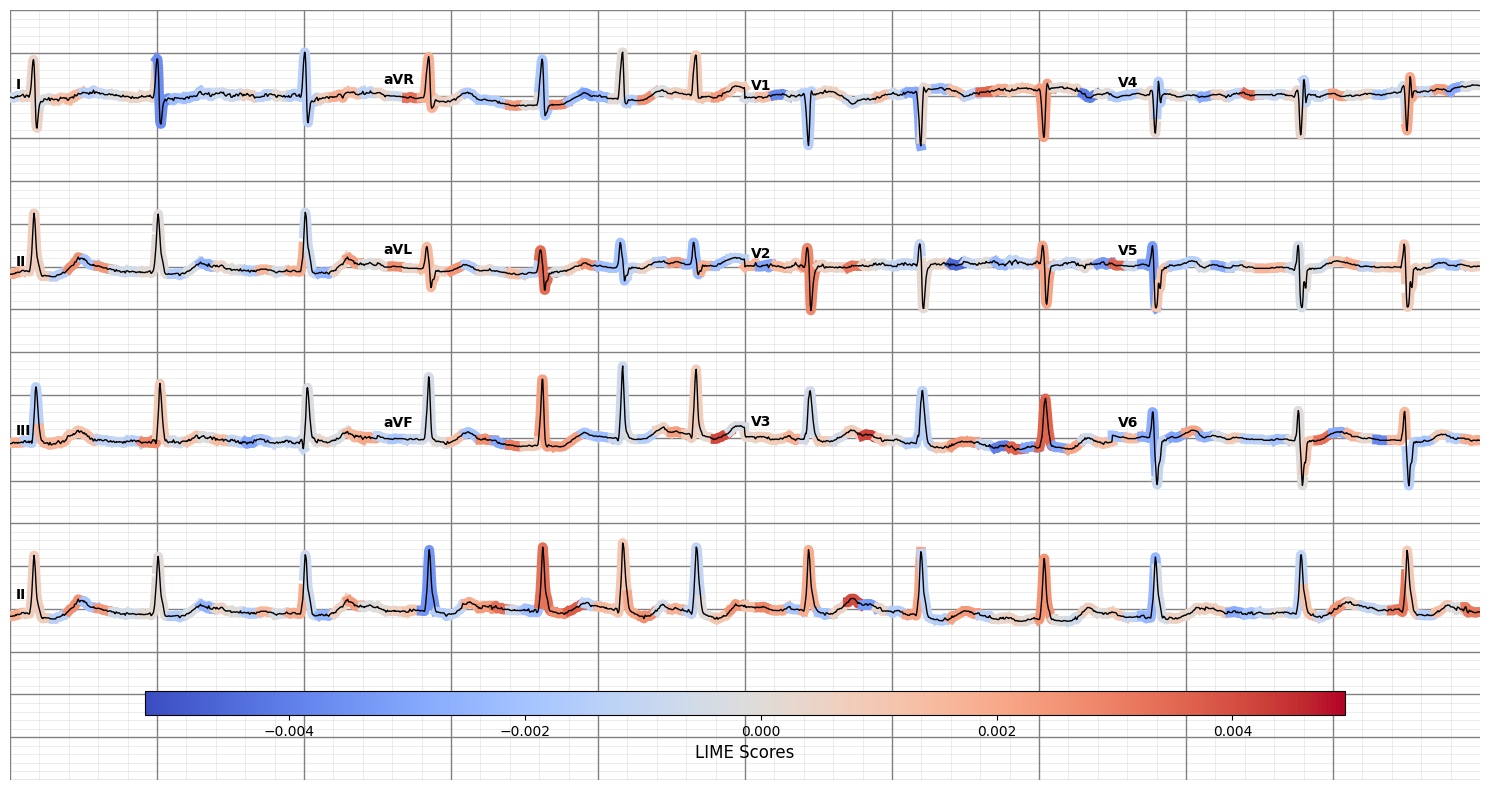

In [236]:
sorted_data = sorted(explanation.as_list(), key=lambda x: x[0])
plot_ecg_with_lime(X_eval=X_eval, index=11, sorted_data=sorted_data, window_size=25)

In [222]:
top_three_matches = find_top_three_matches_with_confidence(
    Y_true, Y_pred, new_label_names, 'Atrial flutter', confidence_threshold=0.9
)

# Output
print("Top three matches (index, confidence):", top_three_matches)

Top three matches (index, confidence): [(779, 0.97571826), (796, 0.9055851), (807, 0.901747), (817, 0.96170926), (3381, 0.940858), (3399, 0.9129652), (3405, 0.95755565), (3407, 0.92403877), (3408, 0.92710865), (3410, 0.9169902)]


In [223]:
# Example usage
x_eval_index = 779  # Choose the instance index
label_name = 'Atrial flutter'
new_label_names = new_label_names

try:
    explanation = explain_instance(X_eval[x_eval_index], label_name, new_label_names)
    print(f"Explanation for label '{label_name}':")
    print(explanation.as_list())
except ValueError as e:
    print(e)

Explanation for label 'Atrial flutter':
[(486, -0.0007219741565121764), (1193, -0.0006754894740471303), (182, 0.0006610200380645009), (174, 0.0005820152217989933), (1124, 0.0005699691586728328), (258, 0.0005488027279452024), (470, 0.0005363599006116201), (812, -0.0005314689011915215), (613, 0.0005270847045139279), (372, 0.0005270450754583838), (850, 0.000524419827351358), (778, -0.000517511713645519), (732, 0.0004961531359874171), (230, 0.0004959349565507844), (136, -0.0004839610235358529), (345, 0.00048180036693220977), (397, -0.0004639094850118236), (228, 0.0004635344789410856), (989, 0.0004617417477740301), (518, -0.0004573753644854601), (594, 0.0004546868487334983), (1187, 0.00045309117826170935), (382, -0.00045060633437728193), (809, -0.0004491802860960643), (493, -0.00044752893111715656), (295, 0.00044529718067722144), (950, 0.000430480256932532), (276, -0.0004284252162774233), (802, -0.0004268661595968865), (90, 0.000424715813037812), (242, 0.00042151722940975947), (902, 0.00041

In [224]:
sorted_data = sorted(explanation.as_list(), key=lambda x: x[0])

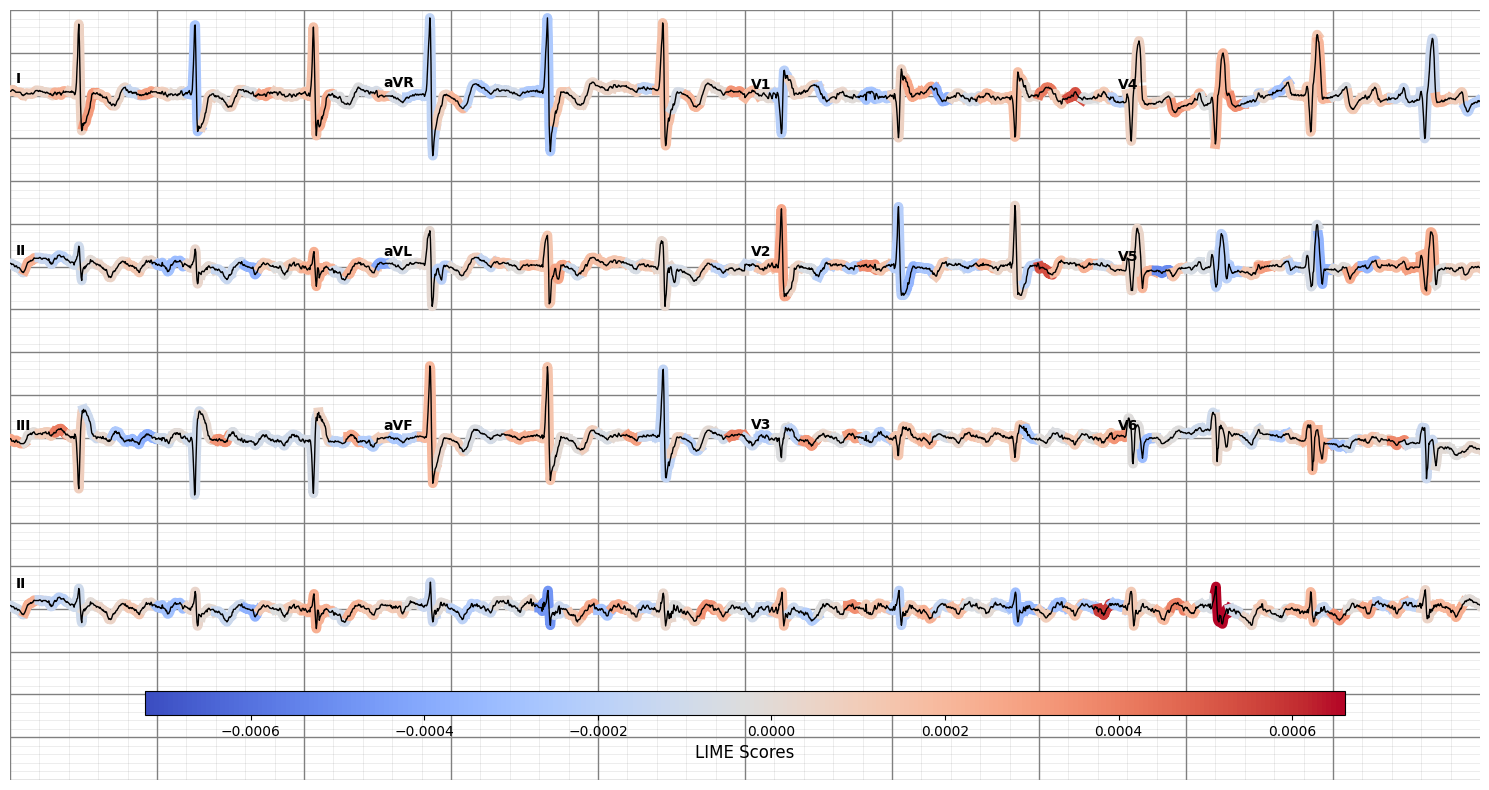

In [225]:
plot_ecg_with_lime(X_eval=X_eval, index=779, sorted_data=sorted_data, window_size=25)

In [226]:
top_three_matches = find_top_three_matches_with_confidence(
    Y_true, Y_pred, new_label_names, 'Acute MI', confidence_threshold=0.9
)

# Output
print("Top three matches (index, confidence):", top_three_matches)

Top three matches (index, confidence): [(107, 0.9016491), (108, 0.91241574), (109, 0.94935197), (110, 0.97670245), (111, 0.9416964), (280, 0.9279344), (1938, 0.95297533), (2262, 0.9879893), (6301, 0.9382159), (6400, 0.96745735)]


In [227]:
# Example usage
x_eval_index = 2262  # Choose the instance index
label_name = 'Acute MI'
new_label_names = new_label_names

try:
    explanation = explain_instance(X_eval[x_eval_index], label_name, new_label_names)
    print(f"Explanation for label '{label_name}':")
    print(explanation.as_list())
except ValueError as e:
    print(e)

Explanation for label 'Acute MI':
[(901, -0.013486088071776507), (33, 0.011399145207549468), (365, -0.011081563485296195), (185, 0.01050929731105862), (298, -0.010135743156445534), (131, 0.00988266093746367), (973, -0.009637459695844895), (76, -0.009488296886028674), (421, 0.009379237014718217), (839, 0.00911293402659478), (511, 0.009013100777139628), (806, -0.008960895880801229), (719, 0.008824416809862984), (390, -0.008820408425659182), (208, 0.008818808881506586), (212, 0.008696994213393969), (257, 0.008612663906102401), (652, -0.0084261209220518), (844, 0.008374536841444975), (1094, 0.008282138637220285), (124, 0.008220231541430765), (1114, 0.008215158098920507), (702, 0.008202784591333336), (931, -0.008036126985152969), (229, -0.007891873248802096), (727, 0.007889928954596016), (988, -0.007720819022478166), (0, 0.0076314914721552695), (659, 0.0075977310343591335), (419, -0.007430487370344647), (632, 0.007371577199737669), (681, -0.0073266320921630025), (311, 0.007315697927108538),

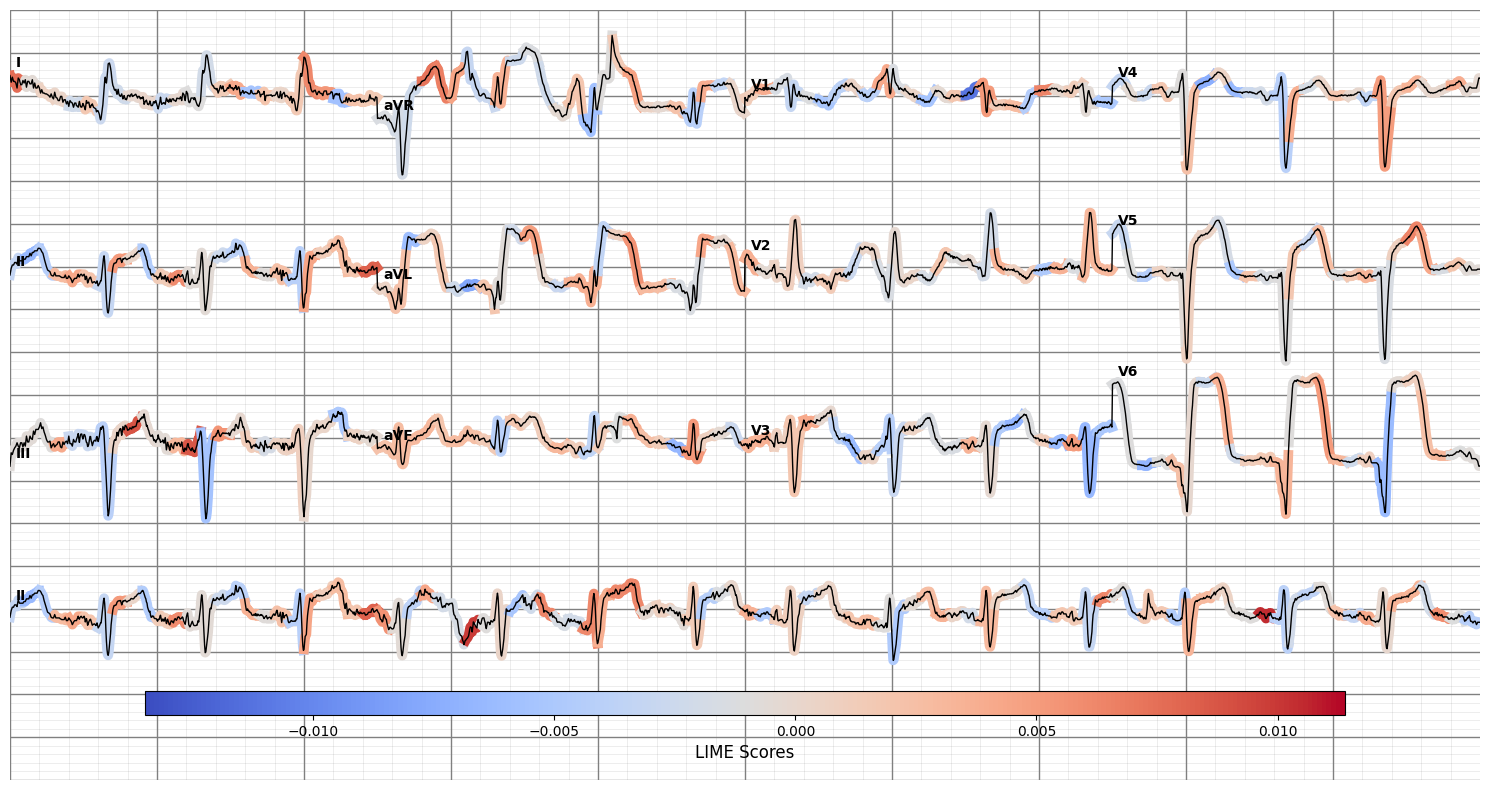

In [228]:
sorted_data = sorted(explanation.as_list(), key=lambda x: x[0])
plot_ecg_with_lime(X_eval=X_eval, index=2262, sorted_data=sorted_data, window_size=25)

In [229]:
top_three_matches = find_top_three_matches_with_confidence(
    Y_true, Y_pred, new_label_names, 'Acute pericarditis', confidence_threshold=0.92
)

# Output
print("Top three matches (index, confidence):", top_three_matches)

Top three matches (index, confidence): [(110308, 0.922106), (160913, 0.9223189)]


In [237]:
# Example usage
x_eval_index = 110308  # Choose the instance index
label_name = 'Acute pericarditis'
new_label_names = new_label_names

try:
    explanation = explain_instance(X_eval[x_eval_index], label_name, new_label_names)
    print(f"Explanation for label '{label_name}':")
    print(explanation.as_list())
except ValueError as e:
    print(e)

Explanation for label 'Acute pericarditis':
[(710, -0.00036021671290998095), (586, 0.00030325849577904395), (456, 0.0002920232884276686), (281, -0.0002837839514829009), (66, -0.0002634859993305815), (46, 0.0002633764560626639), (108, 0.0002597632470151314), (325, 0.0002587787966504413), (780, -0.00025319250220610256), (611, -0.00025243521275593274), (792, 0.00024711933038906383), (256, -0.0002466411339364312), (546, 0.00023981916498326276), (681, 0.00023370150613408194), (1172, 0.00023105345932037636), (845, -0.0002297168551336462), (467, -0.00022848948081934258), (666, -0.00022191664703305027), (194, 0.00021803339982071098), (519, 0.00021673710052212504), (674, 0.00021553966944842814), (1058, -0.00021241683707964363), (263, -0.0002116492984956928), (824, -0.00021159985444312121), (976, -0.00020956952422111863), (7, 0.00020676746765036367), (667, -0.00020545492831597624), (927, 0.00020361839810761822), (306, -0.00020085762051636445), (487, -0.0001986846058414991), (726, 0.0001976988391

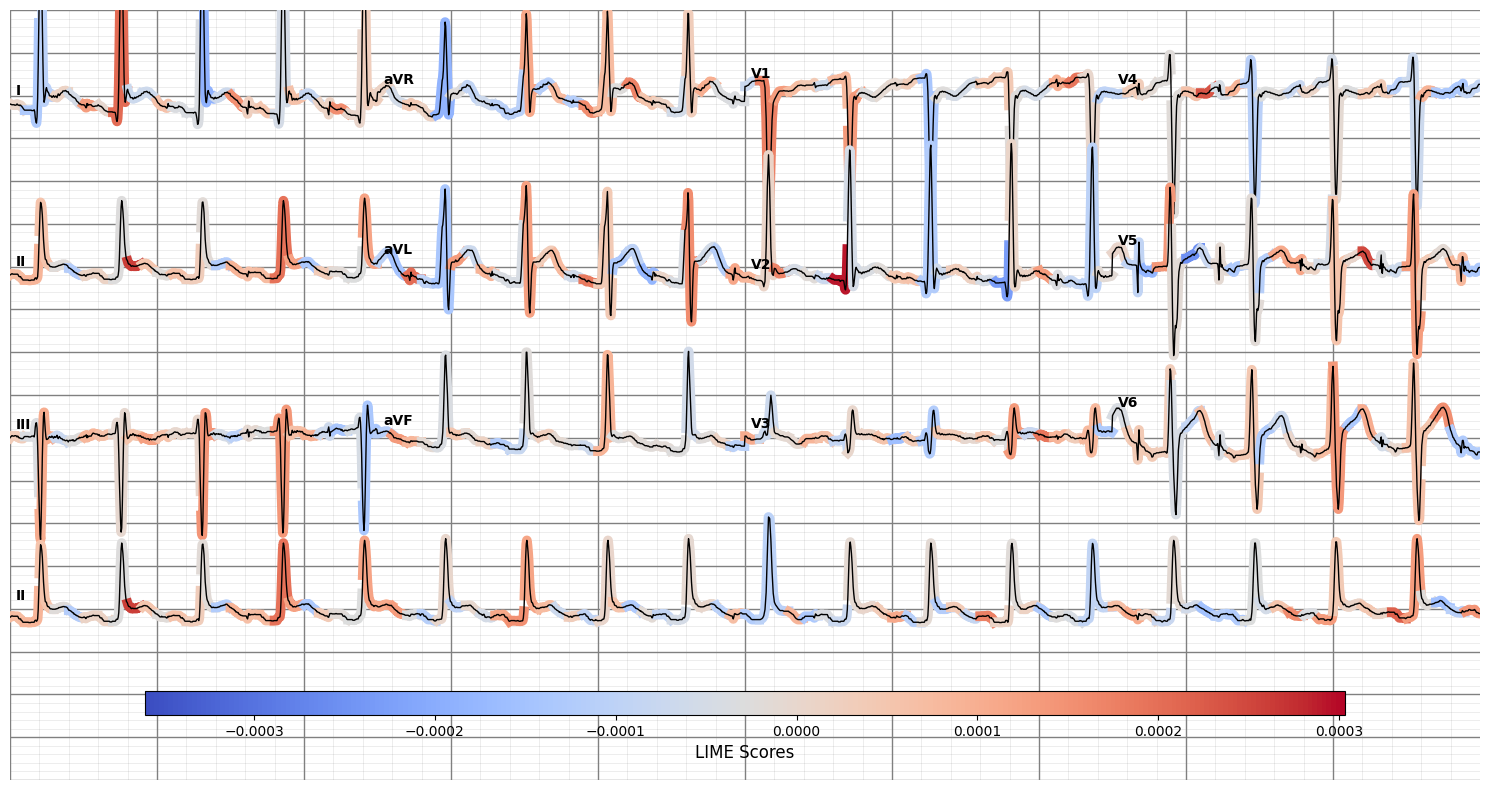

In [238]:
sorted_data = sorted(explanation.as_list(), key=lambda x: x[0])
plot_ecg_with_lime(X_eval=X_eval, index=110308, sorted_data=sorted_data, window_size=25)